In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('UG Savings Prospects - Activity (1).csv')
data.head(2)

,CREATION_MONTH,ACTIVE_2024,LOGINS,USERS,MOM_GROWTH_RATE
0,2025-02-01 00:00:00.000,0,6489,6984,-20.38
1,2025-01-01 00:00:00.000,0,8213,8772,10.24


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CREATION_MONTH   21 non-null     object 
 1   ACTIVE_2024      21 non-null     int64  
 2   LOGINS           21 non-null     int64  
 3   USERS            21 non-null     int64  
 4   MOM_GROWTH_RATE  20 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 972.0+ bytes


In [4]:
data['CREATION_MONTH'] = pd.to_datetime(data['CREATION_MONTH'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CREATION_MONTH   21 non-null     datetime64[ns]
 1   ACTIVE_2024      21 non-null     int64         
 2   LOGINS           21 non-null     int64         
 3   USERS            21 non-null     int64         
 4   MOM_GROWTH_RATE  20 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 972.0 bytes


In [6]:
data.head(2)

,CREATION_MONTH,ACTIVE_2024,LOGINS,USERS,MOM_GROWTH_RATE
0,2025-02-01,0,6489,6984,-20.38
1,2025-01-01,0,8213,8772,10.24


In [7]:
train = data[data['CREATION_MONTH'] < '2024-12-01']
test = data[data['CREATION_MONTH'] >= '2024-12-01']

In [8]:
test

,CREATION_MONTH,ACTIVE_2024,LOGINS,USERS,MOM_GROWTH_RATE
0,2025-02-01,0,6489,6984,-20.38
1,2025-01-01,0,8213,8772,10.24
2,2024-12-01,2544,7559,7957,-9.07


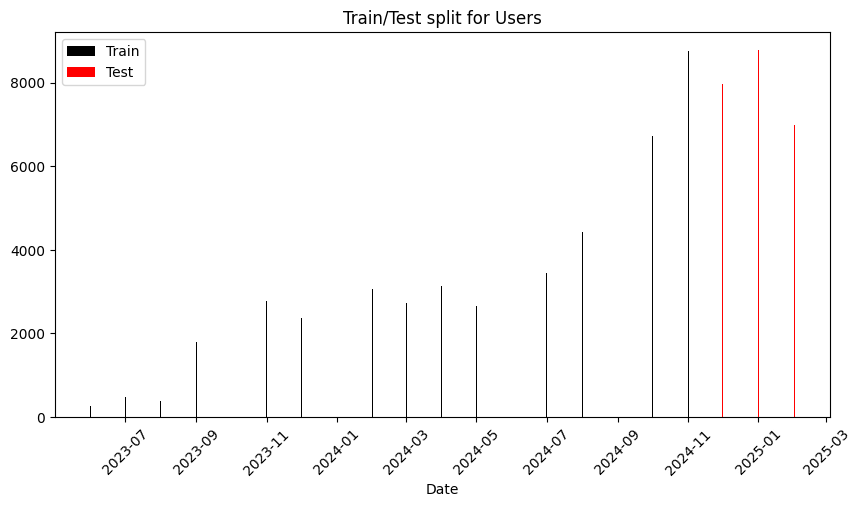

In [9]:
plt.figure(figsize=(10, 5))
plt.bar(train['CREATION_MONTH'], train['USERS'], color="black", label="Train")
plt.bar(test['CREATION_MONTH'], test['USERS'], color="red", label="Test")

# plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Users")
plt.legend()
plt.show()

In [10]:
X= data['CREATION_MONTH']
y=data['USERS']


In [11]:
from statsmodels.tsa.arima.model import ARIMA

In [12]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [13]:
SARIMAXmodel = SARIMAX(y, order = (1, 1, 1), seasonal_order=(2,2,2,12))
SARIMAXmodel = SARIMAXmodel.fit()



/Users/fido_josephine/Documents/New-Fraud-Rules/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/fido_josephine/Documents/New-Fraud-Rules/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [14]:
future_steps = 12
sarimax_forecast = SARIMAXmodel.forecast(steps=future_steps)

# Create future dates for alignment
future_dates = pd.date_range(data["CREATION_MONTH"].max(), periods=future_steps + 1, freq="MS")[1:]

# Store forecast results
sarimax_results = pd.DataFrame({"CREATION_MONTH": future_dates, "USERS": sarimax_forecast})

In [15]:
sarimax_results

,CREATION_MONTH,USERS
21,2025-03-01,653.500063
22,2025-04-01,1387.000185
23,2025-05-01,769.000082
24,2025-06-01,102.998253
25,2025-07-01,-1671.001747
26,2025-08-01,-2228.001747
27,2025-09-01,-2244.001747
28,2025-10-01,1310.998253
29,2025-11-01,-154.001747
30,2025-12-01,-2692.001747


In [16]:
y_pred = SARIMAXmodel.get_forecast(len(test['CREATION_MONTH']))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test['CREATION_MONTH']
y_pred_out = y_pred_df["Predictions"] 
y_pred_out

CREATION_MONTH
2025-02-01     653.500063
2025-01-01    1387.000185
2024-12-01     769.000082
Name: Predictions, dtype: float64

In [17]:
test

,CREATION_MONTH,ACTIVE_2024,LOGINS,USERS,MOM_GROWTH_RATE
0,2025-02-01,0,6489,6984,-20.38
1,2025-01-01,0,8213,8772,10.24
2,2024-12-01,2544,7559,7957,-9.07


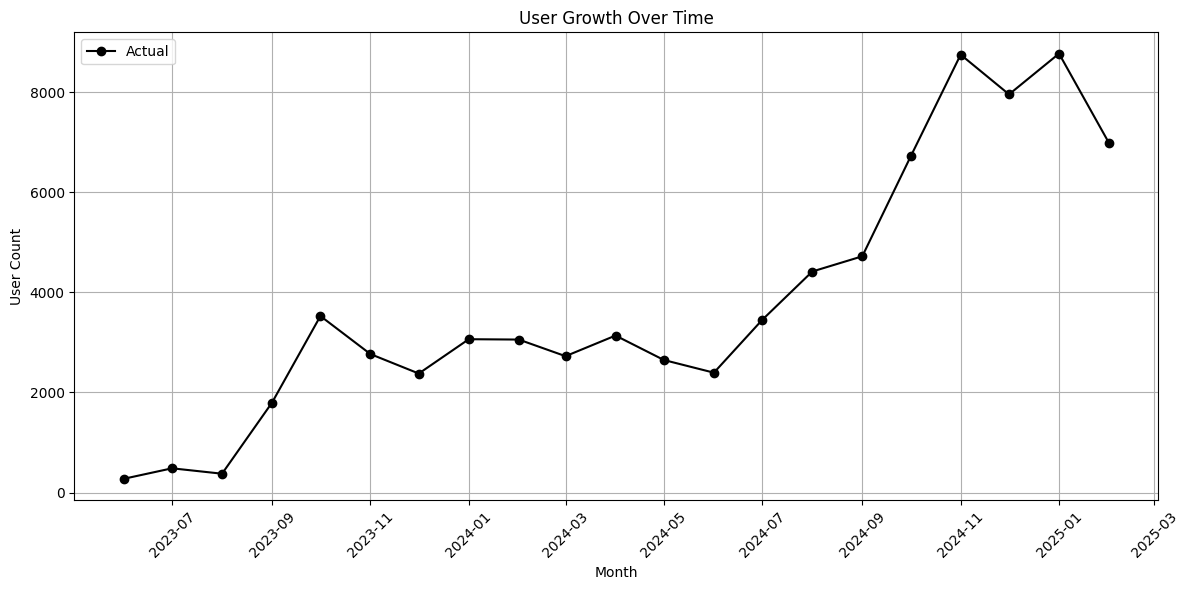

/Users/fido_josephine/Documents/New-Fraud-Rules/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/fido_josephine/Documents/New-Fraud-Rules/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/fido_josephine/Documents/New-Fraud-Rules/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


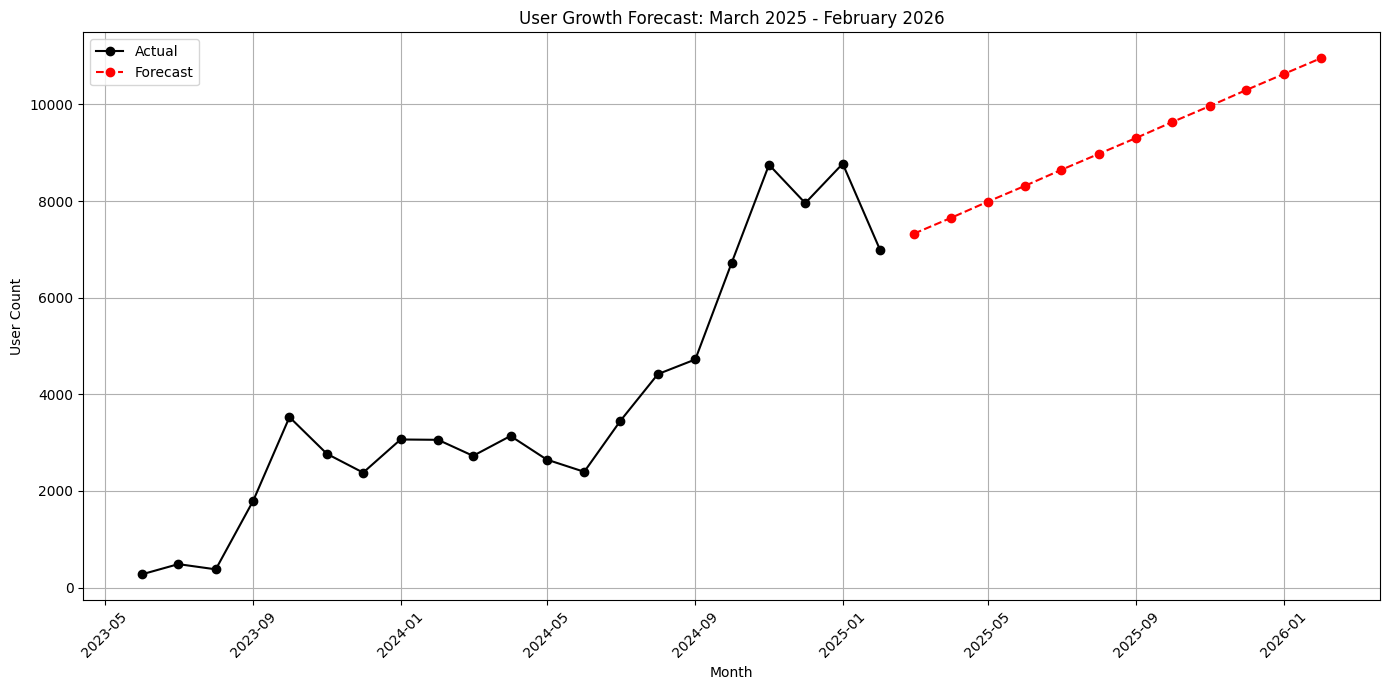

Forecasted User Counts:
CREATION_MONTH        USERS
    2025-03-01  7324.823971
    2025-04-01  7655.067646
    2025-05-01  7985.311322
    2025-06-01  8315.554997
    2025-07-01  8645.798672
    2025-08-01  8976.042348
    2025-09-01  9306.286023
    2025-10-01  9636.529698
    2025-11-01  9966.773373
    2025-12-01 10297.017049
    2026-01-01 10627.260724
    2026-02-01 10957.504399


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load data
# file_path = "/mnt/data/UG Savings Prospects (1).csv"
df = data.copy()

# Convert CREATION_MONTH to datetime and sort values
df['CREATION_MONTH'] = pd.to_datetime(df['CREATION_MONTH'])
df = df.sort_values('CREATION_MONTH')

# Plot actual user data
plt.figure(figsize=(12, 6))
plt.plot(df['CREATION_MONTH'], df['USERS'], marker='o', linestyle='-', color='black', label="Actual")
plt.xlabel("Month")
plt.ylabel("User Count")
plt.title("User Growth Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# Fit an Exponential Smoothing model
model = ExponentialSmoothing(df['USERS'], trend='add', seasonal=None)
fit = model.fit()

# Forecast for the next 12 months (March 2025 - Feb 2026)
# Calculate start date (should be March 2025)
last_date = df['CREATION_MONTH'].max()
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=12, freq='MS')

# Generate forecast
forecast = fit.forecast(steps=12)

# Create DataFrame for forecasted values
forecast_df = pd.DataFrame({'CREATION_MONTH': future_dates, 'USERS': forecast})

# Combine actual and forecasted data
df_extended = pd.concat([df, forecast_df])

# Plot actual vs forecasted values
plt.figure(figsize=(14, 7))
plt.plot(df['CREATION_MONTH'], df['USERS'], marker='o', linestyle='-', color="black", label="Actual")
plt.plot(forecast_df['CREATION_MONTH'], forecast_df['USERS'], marker='o', linestyle='--', color="red", label="Forecast")
plt.xlabel("Month")
plt.ylabel("User Count")
plt.title("User Growth Forecast: March 2025 - February 2026")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Print forecasted values
print("Forecasted User Counts:")
print(forecast_df[['CREATION_MONTH', 'USERS']].to_string(index=False))

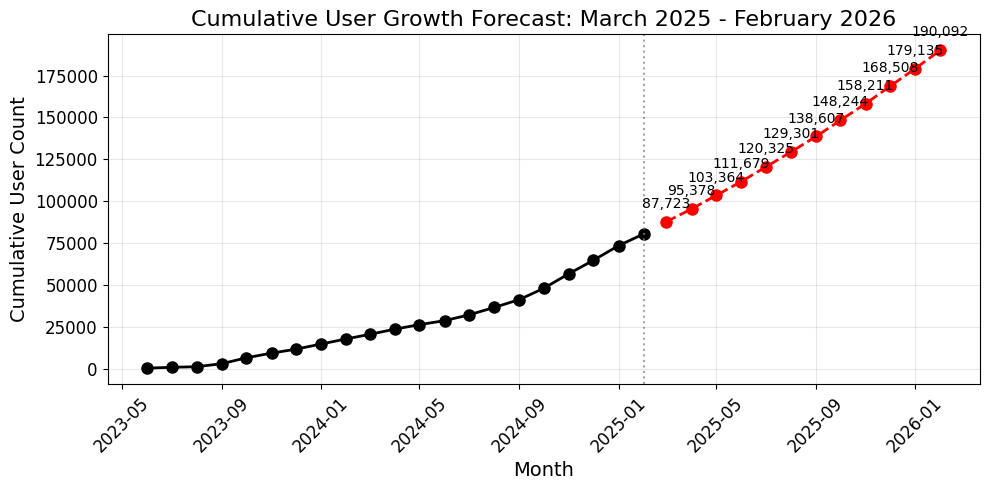

In [19]:
# Create a bigger figure just for the cumulative users plot
plt.figure(figsize=(10, 5))

# Calculate cumulative users for the entire extended dataset
df_extended['CUMULATIVE_USERS'] = df_extended['USERS'].cumsum()

# Split the data to show actual vs forecast with different styles
actual_data = df_extended[df_extended['CREATION_MONTH'] <= df['CREATION_MONTH'].max()]
forecast_data = df_extended[df_extended['CREATION_MONTH'] > df['CREATION_MONTH'].max()]

# Plot actual cumulative data
plt.plot(actual_data['CREATION_MONTH'], actual_data['CUMULATIVE_USERS'], 
         marker='o', linestyle='-', linewidth=2, markersize=8, color="black", label="Actual Cumulative")

# Plot forecasted cumulative data
plt.plot(forecast_data['CREATION_MONTH'], forecast_data['CUMULATIVE_USERS'], 
         marker='o', linestyle='--', linewidth=2, markersize=8, color="red", label="Forecast Cumulative")

# Add separation line
plt.axvline(x=df['CREATION_MONTH'].max(), color='gray', linestyle=':', alpha=0.7)

# Add labels and title
plt.xlabel("Month", fontsize=14)
plt.ylabel("Cumulative User Count", fontsize=14)
plt.title("Cumulative User Growth Forecast: March 2025 - February 2026", fontsize=16)

# Improve x-axis formatting
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add grid and legend
plt.grid(True, alpha=0.3)
# plt.legend(fontsize=14)

# Add data points annotations for the forecast period
for i, row in forecast_data.iterrows():
    plt.annotate(f"{int(row['CUMULATIVE_USERS']):,}", 
                 (row['CREATION_MONTH'], row['CUMULATIVE_USERS']),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', 
                 fontsize=10)

plt.tight_layout()
plt.show()

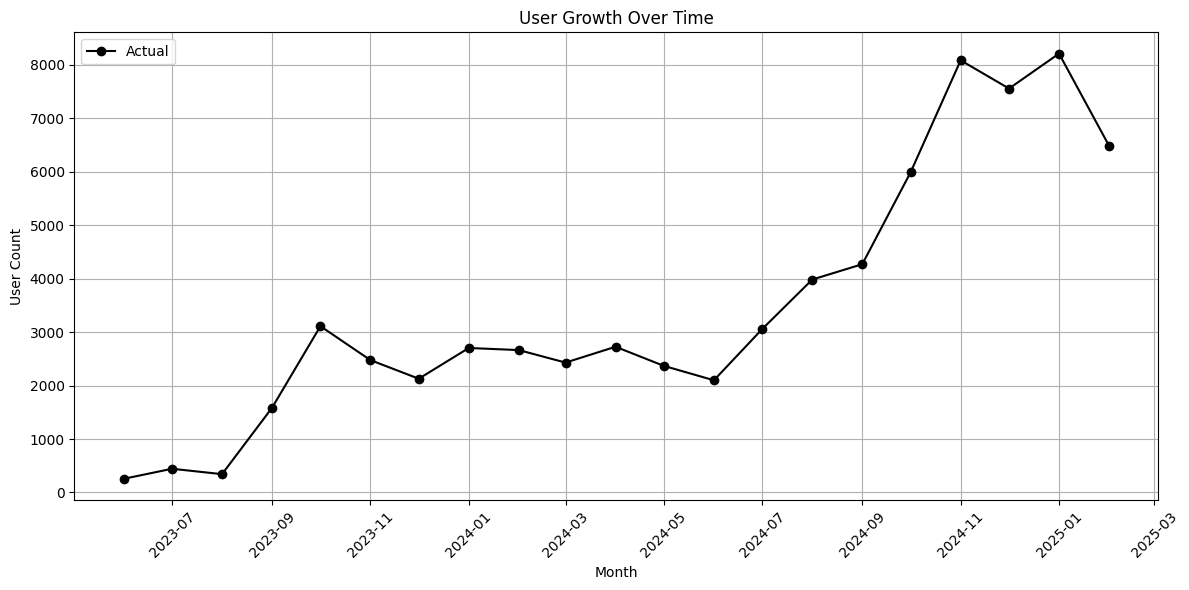

/Users/fido_josephine/Documents/New-Fraud-Rules/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/fido_josephine/Documents/New-Fraud-Rules/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/fido_josephine/Documents/New-Fraud-Rules/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


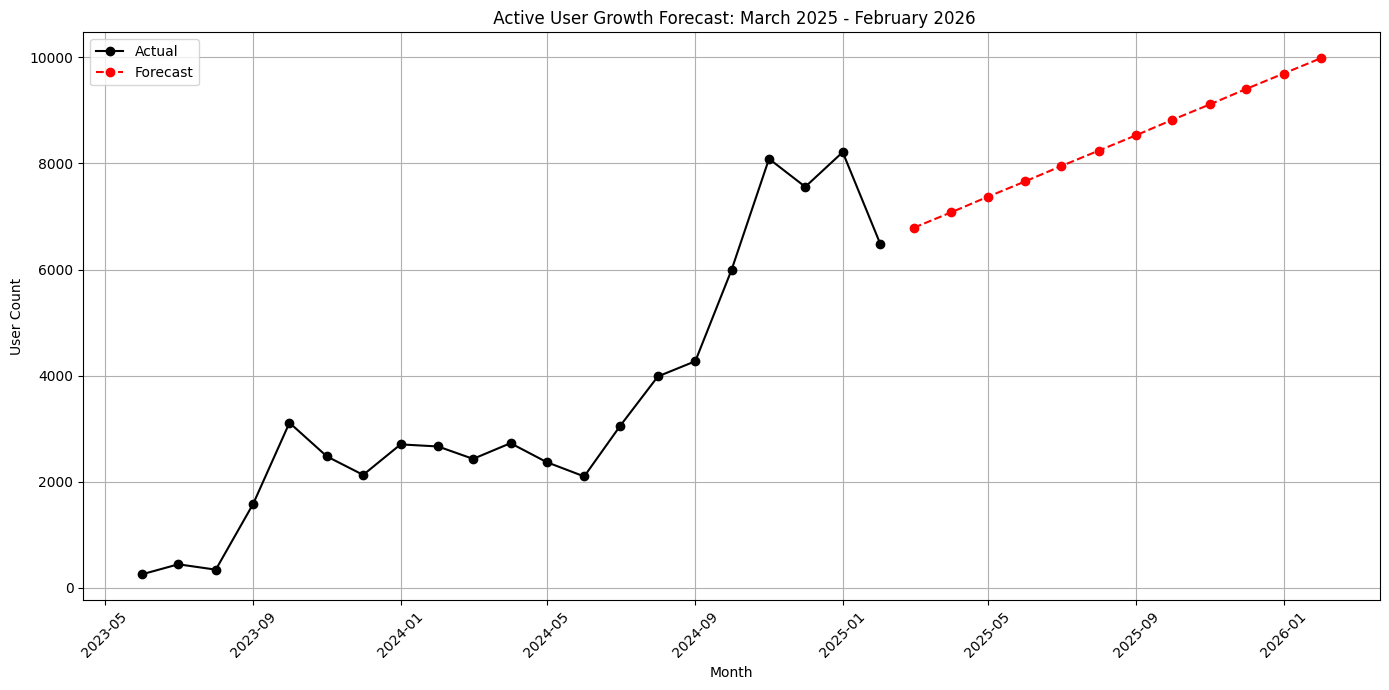

Forecasted Active User Counts:
CREATION_MONTH      LOGINS
    2025-03-01 6789.531076
    2025-04-01 7079.997801
    2025-05-01 7370.464525
    2025-06-01 7660.931250
    2025-07-01 7951.397974
    2025-08-01 8241.864699
    2025-09-01 8532.331423
    2025-10-01 8822.798148
    2025-11-01 9113.264872
    2025-12-01 9403.731597
    2026-01-01 9694.198321
    2026-02-01 9984.665046


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load data
# file_path = "/mnt/data/UG Savings Prospects (1).csv"
df = data.copy()

# Convert CREATION_MONTH to datetime and sort values
df['CREATION_MONTH'] = pd.to_datetime(df['CREATION_MONTH'])
df = df.sort_values('CREATION_MONTH')

# Plot actual user data
plt.figure(figsize=(12, 6))
plt.plot(df['CREATION_MONTH'], df['LOGINS'], marker='o', linestyle='-', color='black', label="Actual")
plt.xlabel("Month")
plt.ylabel("User Count")
plt.title("User Growth Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# Fit an Exponential Smoothing model
model = ExponentialSmoothing(df['LOGINS'], trend='add', seasonal=None)
fit = model.fit()

# Forecast for the next 12 months (March 2025 - Feb 2026)
# Calculate start date (should be March 2025)
last_date = df['CREATION_MONTH'].max()
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=12, freq='MS')

# Generate forecast
forecast = fit.forecast(steps=12)

# Create DataFrame for forecasted values
forecast_df = pd.DataFrame({'CREATION_MONTH': future_dates, 'LOGINS': forecast})

# Combine actual and forecasted data
df_extended = pd.concat([df, forecast_df])

# Plot actual vs forecasted values
plt.figure(figsize=(14, 7))
plt.plot(df['CREATION_MONTH'], df['LOGINS'], marker='o', linestyle='-', color="black", label="Actual")
plt.plot(forecast_df['CREATION_MONTH'], forecast_df['LOGINS'], marker='o', linestyle='--', color="red", label="Forecast")
plt.xlabel("Month")
plt.ylabel("User Count")
plt.title(" Active User Growth Forecast: March 2025 - February 2026")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Print forecasted values
print("Forecasted Active User Counts:")
print(forecast_df[['CREATION_MONTH', 'LOGINS']].to_string(index=False))

In [21]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from statsmodels.tsa.holtwinters import ExponentialSmoothing

# # Load data
# # file_path = "/mnt/data/UG Savings Prospects (1).csv"
# df = data.copy()

# # Convert CREATION_MONTH to datetime and sort values
# df['CREATION_MONTH'] = pd.to_datetime(df['CREATION_MONTH'])
# df = df.sort_values('CREATION_MONTH')

# # Plot actual user data
# plt.figure(figsize=(10, 5))
# plt.plot(df['CREATION_MONTH'], df['USERS'], marker='o', linestyle='-', color='black', label="Actual")
# plt.xlabel("Month")
# plt.ylabel("User Count")
# plt.title("User Growth Over Time")
# plt.xticks(rotation=45)
# plt.grid()
# plt.legend()
# plt.show()

# # Fit an Exponential Smoothing model
# model = ExponentialSmoothing(df['USERS'], trend='add', seasonal=None)
# fit = model.fit()

# # Forecast for the next 4 months
# future_dates = pd.date_range(df['CREATION_MONTH'].max(), periods=5, freq='MS')[1:]
# forecast = fit.forecast(steps=12)

# # Create DataFrame for forecasted values
# forecast_df = pd.DataFrame({'CREATION_MONTH': future_dates, 'USERS': forecast})

# # Combine actual and forecasted data
# df_extended = pd.concat([df, forecast_df])

# # Plot actual vs forecasted values
# plt.figure(figsize=(10, 5))
# plt.plot(df['CREATION_MONTH'], df['USERS'], marker='o', linestyle='-', color="black", label="Actual")
# plt.plot(forecast_df['CREATION_MONTH'], forecast_df['USERS'], marker='o', linestyle='--', color="red", label="Forecast")
# plt.xlabel("Month")
# plt.ylabel("User Count")
# plt.title("User Growth Forecast for Next 4 Months")
# plt.xticks(rotation=45)
# plt.legend()
# plt.grid()
# plt.show()

# # Print forecasted values
# print("Forecasted User Counts:")
# print(forecast_df)
